# ch3 평가(P147) 

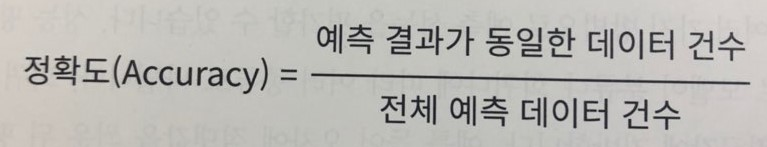

# kaggle- titanic dataset - 다운받기... but 회원가입이 되어있지 않으면 다운 불가 

### but 케글 가입이 안되네??

# 타이타닉 예제 

In [1]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
#P133
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
#P134

titanic_df['Age'].fillna(titanic_df['Age'].mean() , inplace=True)

titanic_df['Cabin'].fillna('N' , inplace=True)

titanic_df['Embarked'].fillna('N' , inplace=True)

print('데이터 세트 Null 값 개수' , titanic_df.isnull().sum().sum())


데이터 세트 Null 값 개수 0


In [5]:
print('Sex 값 분포: \n' , titanic_df['Sex'].value_counts()    )

print('\n Cabin 값 분포: \n' , titanic_df['Cabin'].value_counts()  )

print('\n Embarked 값 분포: \n' , titanic_df['Embarked'].value_counts()  )

Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포: 
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
D                3
              ... 
E38              1
C90              1
C110             1
C101             1
B80              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [6]:
# P135
titanic_df['Cabin']= titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [7]:
# P136
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

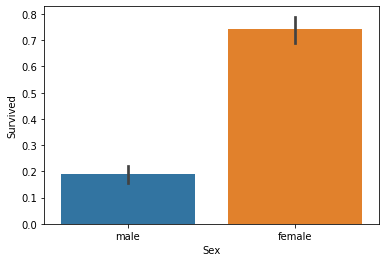

In [8]:
import seaborn as sns
sns.barplot(x='Sex' , y="Survived" ,data = titanic_df )

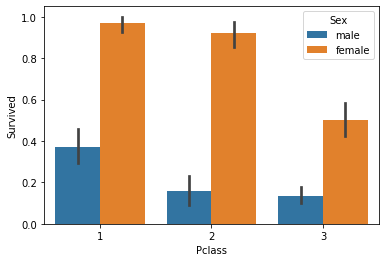

In [9]:
# P137

sns.barplot(x='Pclass' , y="Survived" , hue="Sex" ,data = titanic_df )


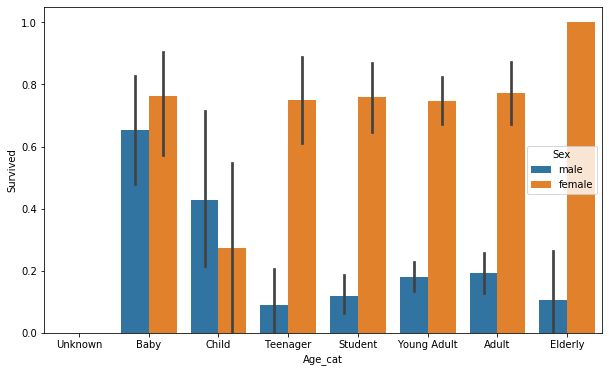

In [10]:
# P137

def get_category(age):
    cat=''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat
    
plt.figure(figsize=(10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student','Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y="Survived" ,hue='Sex' , data=titanic_df,order=group_names)
titanic_df.drop('Age_cat' , axis=1 , inplace=True)

In [11]:
# P139

from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [12]:
# P140

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId' ,'Name', 'Ticket' ] ,axis=1 , inplace =True)
    return df

def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le=le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df 

# P141

In [13]:

titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived' , axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# P142

In [16]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {:.4f}'.format(accuracy_score(y_test,dt_pred)))

rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {:.4f}'.format(accuracy_score(y_test,rf_pred)))

lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count , (train_index ,test_index) in enumerate(kfold.split(X_titanic_df)):
        
        X_train ,X_test = X_titanic_df.values[train_index] , X_titanic_df.values[test_index]
        y_train ,y_test = y_titanic_df.values[train_index] , y_titanic_df.values[test_index]
        
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy= accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count,accuracy))
        
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
        
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도: 0.7823


# P143

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count,accuracy))

print('평균 정확도: {0:4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도: 0.787929


# P144

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5] , 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터: ' , grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {:0.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredicitons = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredicitons)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}' .format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


# 평가  (●'◡'●)

# P149 위에꺼 

In [20]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0],1):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i]=1
                
        return pred

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)
X_titanic_df=transform_features(X_titanic_df)

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=0)


In [22]:
myclf=MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:4f}'.format(accuracy_score(y_test,mypredictions)))

Dummy Classifier의 정확도는 : 0.614525


# p151

In [48]:
print('레이블 테스트 세트 크기: ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).values_count()

# Dummy...
fakeclf =MyFakeClassifier()
fakeclf.fit(X_train,y_train)

SyntaxError: invalid syntax (<ipython-input-48-ade7ba4c3bb6>, line 6)

# P152

In [24]:
# fakepred = fakeclf.predict(X-test)
# print('모든 예측을 0으로 하여도 정확도는: {:.3f}'.format(accuracy_score(y_test, fakepred)))

# P154 (Confusion_Matrix)

In [25]:


# from sklearn.metrics import confusion_matrix

# confusion_matrix(y_test, fakepred)


In [26]:
# from sklearn.metrics import confusion_matrix

# import sklearn.metrics as skm
# skm.confusion_matrix(y_test, fakepred)


In [27]:
# P156

# P158

In [28]:

from sklearn.metrics import accuracy_score, precision_score,recall_score , confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall  = recall_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f},정밀도:{1:.4f} , 재현율: {2:.4f}'.format(accuracy,precision,recall))    

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train , X_test, y_train , y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492,정밀도:0.7742 , 재현율: 0.7869


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 shape : {0}'.format(pred_proba.shape) )
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:',pred_proba[:3])

pred_proba_result =np.concatenate([pred_proba,pred.reshape(-1,1)] ,axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])



pred_proba()결과 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.4616653  0.5383347 ]
 [0.87862763 0.12137237]
 [0.87727002 0.12272998]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.4616653  0.5383347  1.        ]
 [0.87862763 0.12137237 0.        ]
 [0.87727002 0.12272998 0.        ]]


# P161

In [31]:
from sklearn.preprocessing import Binarizer

x = [[1,-1,2] , [2,0,0], [0,1.1,1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


# P162

In [32]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba_1 = pred_proba[: , 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492,정밀도:0.7742 , 재현율: 0.7869


In [33]:
custom_threshold=0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[99 19]
 [10 51]]
정확도 : 0.8380,정밀도:0.7286 , 재현율: 0.8361


# p168 F1스코어

In [34]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [35]:
# def get_clf_eval(y_test,pred):
#     confusuion= confusion_matrix(y_test,pred)
#     accuracy =accuracy_score(y_tesr ,pred)
#     precision = precision_score(y_test,pred)
#     recall=recall_score(y_test,pred)
    
#     f1 = f1_score (y_test,pred)
#     print('오차 행렬')
#     print(confusion)
    
#     print('정확도: {:.4f} , 정밀도: {1:.4f}, 재현율: {2:.4f} , F1:{3:.4f}' .format(accuracy,precision,recall.f1))
    
# thresholds = [0.4,0.45,0.50,0.55,0.60]
# pred_proba = lr_clf.predict_proba(X_test)
# get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

# ROC곡선과 AUC (P169)

In [36]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test,pred_proba_class1)


# 피마 인디언 당뇨병 사례

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score , recall_score , roc_auc_score
from sklearn.metrics import f1_score , confusion_matrix , precision_recall_curve , roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [38]:
def get_clf_eval(y_test, pred =None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [56]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8, 6))
    thresholds_bounddary =thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_bounddary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:thresholds_bounddary], label='recall')    

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [40]:
def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    for custom_thresholds in thresholds:
        pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
        binarizer = Binarizer(custom_thresholds).fit_transform(pred_proba_1)
        print('임계값: ',custom_thresholds)
        get_clf_eval(y_test, binarizer, pred_proba_1)

In [41]:
diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [42]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# P177

In [43]:
x = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, f1: 0.6392, AUC:0.7919


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

ValueError: Found input variables with inconsistent numbers of samples: [154, 179]

In [49]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

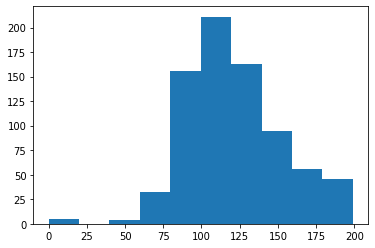

In [50]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [51]:
zero_features = ['Glucose' ,'BloodPressure', 'SkinThickness' , 'Insulin','BMI' ]

total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1} ,  퍼센트는 {2:.2f} %' .format(feature,zero_count,100*zero_count/total_count))

Glucose 0 건수는 5 ,  퍼센트는 0.65 %
BloodPressure 0 건수는 35 ,  퍼센트는 4.56 %
SkinThickness 0 건수는 227 ,  퍼센트는 29.56 %
Insulin 0 건수는 374 ,  퍼센트는 48.70 %
BMI 0 건수는 11 ,  퍼센트는 1.43 %


In [52]:
# P180
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0,mean_zero_features)

In [53]:
# P180

x = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state= 156, stratify = y)

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, f1: 0.6804, AUC:0.8433


In [54]:
# P181

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(x_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임계값:  0.3
오차행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, f1: 0.6615, AUC:0.8433
임계값:  0.33
오차행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, f1: 0.6774, AUC:0.8433
임계값:  0.36
오차행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, f1: 0.6667, AUC:0.8433
임계값:  0.39
오차행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, f1: 0.6667, AUC:0.8433
임계값:  0.42
오차행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, f1: 0.6792, AUC:0.8433
임계값:  0.45
오차행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, f1: 0.6857, AUC:0.8433
임계값:  0.48
오차행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, f1: 0.6931, AUC:0.8433
임계값:  0.5
오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, f1: 0.6804, AUC:0.8433


In [55]:
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, f1: 0.6931, AUC:0.8433
